In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

### Loading and exploring the data

In [7]:
df = pd.read_csv('./stroke_data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Exploring the Data**

In [10]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [11]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [13]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

**Plotting data**

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

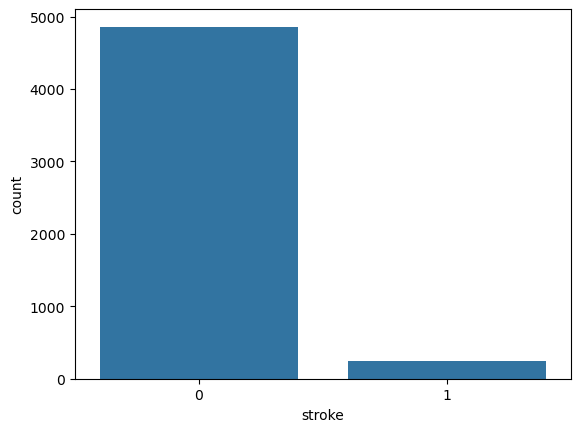

In [17]:
sns.countplot(x='stroke', data = df)
df['gender'].value_counts()

In [23]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

**Filling the missing values manually**

In [26]:
df.fillna({'bmi': df['bmi'].mean()}, inplace = True)

**Encoding the categorical variables**

In [37]:
cat_cols = df.select_dtypes(include = 'object').columns


In [44]:
pd.set_option('future.no_silent_downcasting', True)

In [45]:
df.replace({'Male' : 1, 'Female':0, 'Other': 2}, inplace=True)

In [46]:
for col in cat_cols:
    print(df[col].unique())

[1 0 2]
[1 0]
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [47]:
df.replace({'Yes':1, 'No':0}, inplace = True)

In [49]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,0,61.0,0,0,1,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,1,80.0,0,1,1,Private,Rural,105.92,32.500000,never smoked,1
3,60182,0,49.0,0,0,1,Private,Urban,171.23,34.400000,smokes,1
4,1665,0,79.0,1,0,1,Self-employed,Rural,174.12,24.000000,never smoked,1


In [51]:
df = pd.get_dummies(df, columns=['work_type', 'Residence_type', 'bmi', 'smoking_status'], drop_first=True)

In [55]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,stroke,work_type_Never_worked,work_type_Private,...,bmi_64.4,bmi_64.8,bmi_66.8,bmi_71.9,bmi_78.0,bmi_92.0,bmi_97.6,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,228.69,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,51676,0,61.0,0,0,1,202.21,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,31112,1,80.0,0,1,1,105.92,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,60182,0,49.0,0,0,1,171.23,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,1665,0,79.0,1,0,1,174.12,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [57]:
df.replace({True: 1, False: 0}, inplace = True)

In [58]:
#The data exploring and imputing and encoding is done

In [59]:
df.drop('id', axis=1, inplace = True)

**Making the data ready to fit and valid**

In [94]:
X = df.drop('stroke', axis = 1)
y= df.stroke

y.value_counts(normalize = True)

stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64

**Train Test split**

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

**Training the model**

In [102]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [134]:
model = RandomForestClassifier(class_weight = 'balanced', n_estimators=300,
    max_depth=6,
    min_samples_split=10,
    min_samples_leaf=4, random_state = 42)
model.fit(X_train_bal, y_train_bal)

RandomForestClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=300, random_state=42)

In [135]:
# X_test.head()
y_pred = model.predict(X_test)



In [136]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.88      0.92       972
           1       0.14      0.40      0.21        50

    accuracy                           0.85      1022
   macro avg       0.55      0.64      0.56      1022
weighted avg       0.93      0.85      0.88      1022



<Axes: >

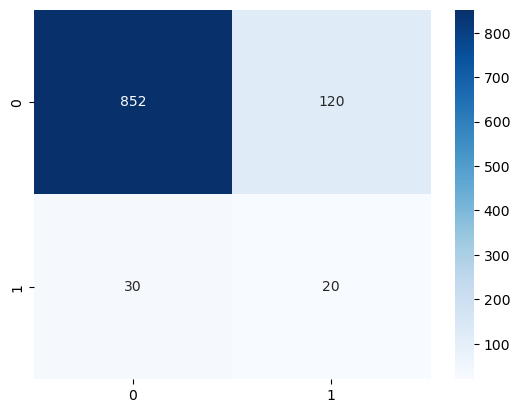

In [137]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')


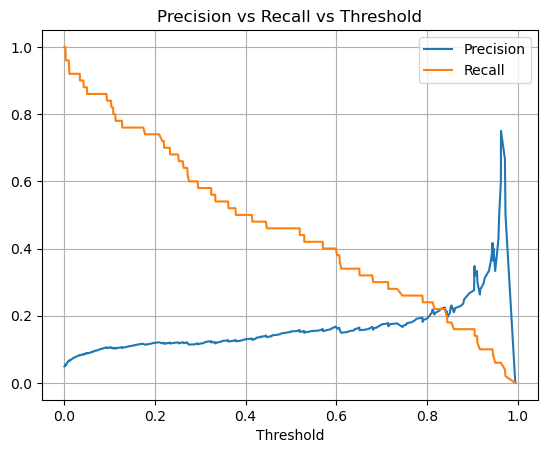

In [133]:
from sklearn.metrics import precision_recall_curve

y_probs = model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel("Threshold")
plt.legend()
plt.grid()
plt.title("Precision vs Recall vs Threshold")
plt.show()
